In [1]:
import os
import json
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
import operator

In [2]:
path_to_relationships = '3RScan/data/relationships.json'
path_to_scene_folders = '3RScan/data/train'

In [3]:
# Iterate over the folders
scene_relationships = {}
i = 0
for scan_folder in os.listdir(path_to_scene_folders):
        
    with open(path_to_relationships) as f:
        relationships_data = json.load(f)

    relationships = relationships_data['scans']

    # Find the relationships for the scene with the given id
    relationships = [r for r in relationships if r['scan'] == scan_folder]
    #print('Found {} relationships dictionary for scene {}'.format(len(relationships), scan_folder))
    if len(relationships) == 0:
        print('no relationships for: ', scan_folder)
        continue
    scene_relationships[scan_folder] = relationships[0]['relationships']
    
    i+=1


no relationships for:  .DS_Store


[359, 109, 320, 179, 193, 186, 206, 37, 183, 964, 1191, 357, 445, 278, 1250, 138, 500, 662, 389, 746, 122, 284, 230, 1402, 1226, 84, 202, 21, 175, 80, 130, 448, 1238, 303, 428, 383, 437, 414, 793, 312, 359, 28, 529, 5167, 20, 254, 391, 226, 849, 73, 186, 228, 482, 105, 550, 392, 263, 1834, 65, 734, 485, 133, 349, 80, 58, 200, 617, 536, 242, 212, 414, 131, 153, 96, 745, 279, 128, 152, 177, 372, 215, 559, 217, 135, 386, 329, 77, 325, 259, 120, 384, 243, 207, 107, 444, 908, 97, 966, 1, 813, 148, 1683, 651, 289, 493, 1064, 581, 86, 210, 1231, 742, 227, 464, 243, 189, 675, 425, 193, 411, 614, 51, 254, 201, 799, 513, 219, 196, 712, 61, 132, 471, 73, 240, 493, 326, 240, 189, 181, 286, 428, 214, 550, 577, 475, 259, 97, 265, 153, 2017, 268, 125, 1547, 824, 33, 2614, 95, 408, 315, 576, 759, 194, 1418, 363, 664, 808, 797, 73, 70, 122, 310, 24, 275, 2371, 404, 258, 186, 72, 80, 961, 245, 167, 78, 250, 1375, 284, 708, 263, 187, 2, 631, 364, 146, 994, 1142, 239, 458, 176, 427, 63, 292, 245, 300, 89,

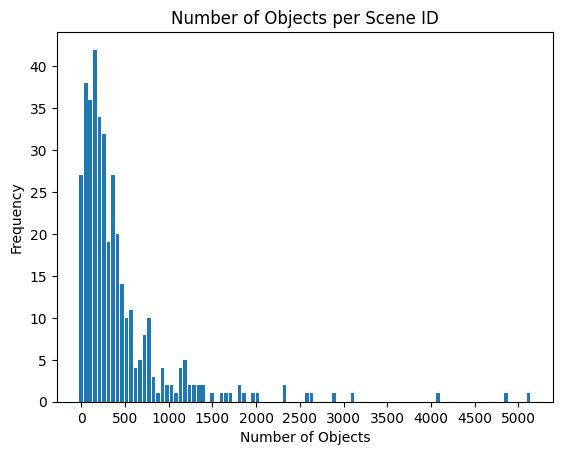

In [4]:
# Number of realtionships per scene
# Count the number of objects per scene ID
object_counts = [len(relationships) for relationships in scene_relationships.values()]
print(object_counts)

# Plot the histogram
plt.hist(object_counts, bins=100, align='left', rwidth=0.8)
plt.xlabel('Number of Objects')
plt.ylabel('Frequency')
plt.title('Number of Objects per Scene ID')

# Set custom tick values and labels for better readability
plt.xticks(np.arange(0, 5500, step=500))


plt.show()

In [5]:
# Count the occurrences of labels
label_counts = {}

for scene_data in scene_relationships.values():
    for object_data in scene_data:
        label = object_data[3]  # Assuming the label is always at index 3
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

# Sort the labels by their occurrences
sorted_labels = sorted(label_counts.items(), key=operator.itemgetter(1), reverse=True)

# Store the labels in a separate list
labels_list = [label for label, _ in sorted_labels]

# Print all the labels in one list
print(labels_list)

# Print the sorted labels and their occurrences
for label, count in sorted_labels:
    print(f"{label}: {count}")

['same object type', 'same shape', 'same color', 'left', 'right', 'close by', 'behind', 'front', 'same material', 'attached to', 'standing on', 'same as', 'lower than', 'higher than', 'same state', 'darker than', 'brighter than', 'lying on', 'smaller than', 'bigger than', 'hanging on', 'same texture', 'supported by', 'cleaner than', 'messier than', 'same symmetry as', 'more comfortable than', 'more closed', 'more open', 'standing in', 'leaning against', 'build in', 'lying in', 'connected to', 'belonging to', 'cover', 'part of', 'fuller than', 'hanging in']
same object type: 37126
same shape: 29132
same color: 17780
left: 15006
right: 15006
close by: 8562
behind: 8179
front: 8179
same material: 7018
attached to: 4097
standing on: 3755
same as: 3188
lower than: 3069
higher than: 3069
same state: 2914
darker than: 2198
brighter than: 2198
lying on: 1425
smaller than: 1295
bigger than: 1295
hanging on: 849
same texture: 832
supported by: 413
cleaner than: 229
messier than: 229
same symmetr